# Name - Riya Kumari

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Automobile_data.csv")

In [3]:
df

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [4]:
df.head(5)

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# Shows data type of each column
df.dtypes

symboling              int64
normalized-losses    float64
Model                 object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'Model', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
# shows last 5 row of dataset
df.tail()

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [8]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,3.133005,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,0.993566,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#show total number of null values at each column
df.isnull().sum()

symboling             0
normalized-losses    41
Model                 0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
df.isnull()

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Filling missing values

In [11]:
#Removes null value from normalize-losses
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].median())

In [12]:
#Removes null value from bore
df['bore'] = df['bore'].fillna(df['bore'].median())

In [13]:
#Removes null value from stroke
df['stroke'] = df['stroke'].fillna(df['stroke'].median())

In [14]:
#Removes null value from price
df['price'] = df['price'].fillna(df['price'].median())

In [15]:
#Removes null value from peak-rpm
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median())

In [16]:
#Removes null value horsepower
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [17]:
#Removes null value from num-of-doors
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].median())

In [18]:
df

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [19]:
df.isnull().sum()

symboling            0
normalized-losses    0
Model                0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
# Countplot graph for Car Model
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Model', ylabel='count'>

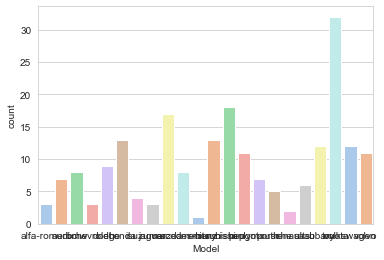

In [21]:
sns.countplot(x='Model',data=df,palette='pastel')

###  Vehicle make frequency diagram

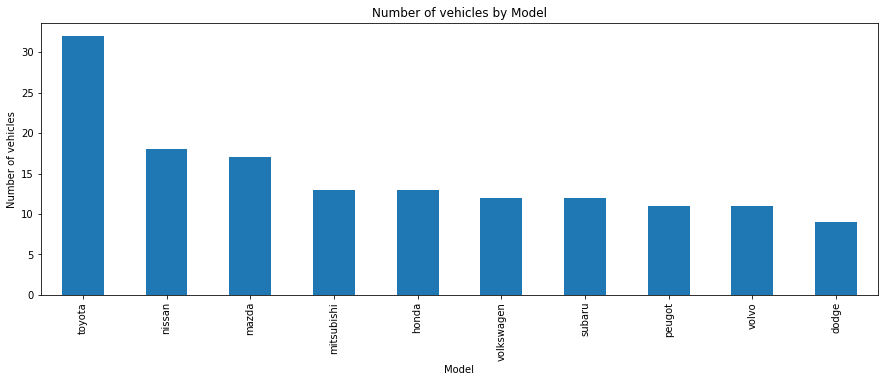

In [4]:
#Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
df.Model.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Model")
plt.ylabel('Number of vehicles')
plt.xlabel('Model');

###  Insurance risk ratings Histogram

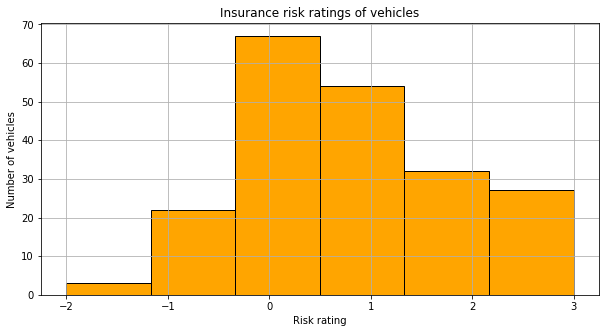

In [25]:
#Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2.
#There are more cars in the range of 0 and 1.
df.symboling.hist(bins=6,color='orange',edgecolor='black');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

### Normalized losses histogram

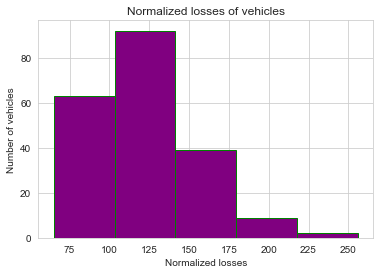

In [24]:
#Normalized losses which is the average loss payment per insured vehicle year is has more
#number of cars in the range between 65 and 150.
df['normalized-losses'].hist(bins=5,color='purple',edgecolor='green');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

### Fuel type bar chart

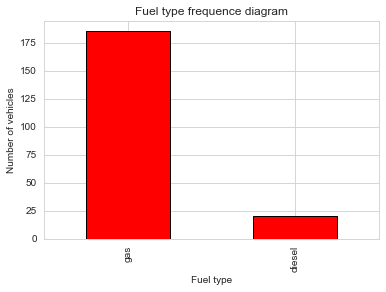

In [25]:
#Gas is preferred by 85 % of the vehicles
df['fuel-type'].value_counts().plot(kind='bar',color='red',edgecolor='black')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

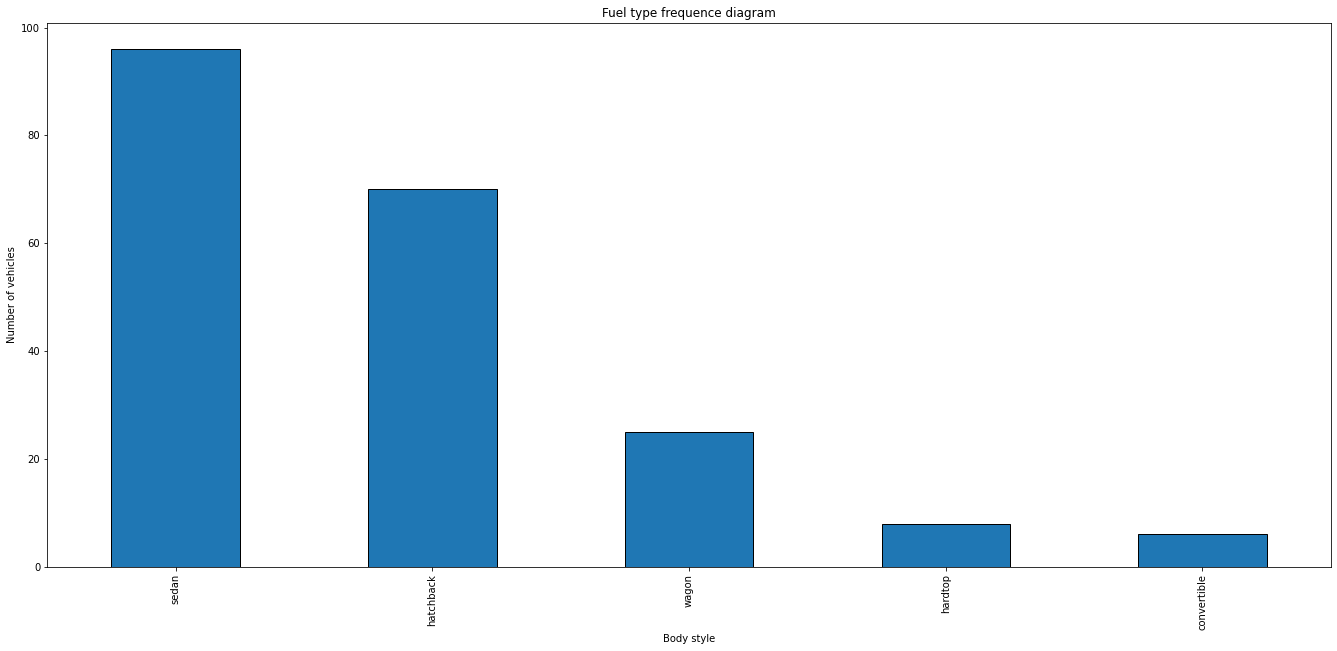

In [34]:
#Most produced vehicle are of body style sedan around 48% followed by hatchback 32%
df['body-style'].value_counts().plot(kind='bar',edgecolor='black')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Body style');

### Fuel type pie diagram

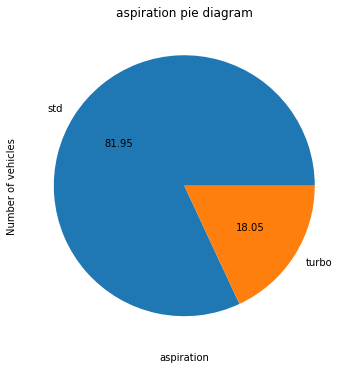

In [23]:
#Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
#Turbo models have higher prices than for the standard model
df['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("aspiration pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('aspiration');

### Drive wheels bar chart

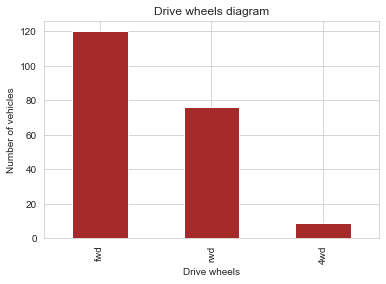

In [29]:
#For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel.
#There are very less number of cars for four wheel drive.
df['drive-wheels'].value_counts().plot(kind='bar',color='brown')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

### Number of doors bar chart

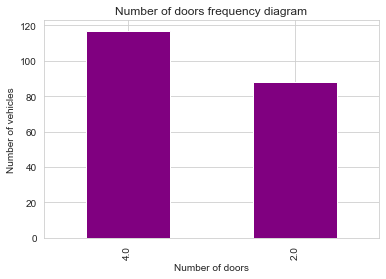

In [30]:
#57% of the cars has 4 doors
df['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Correlation Analysis

In [31]:
corr=df.corr()

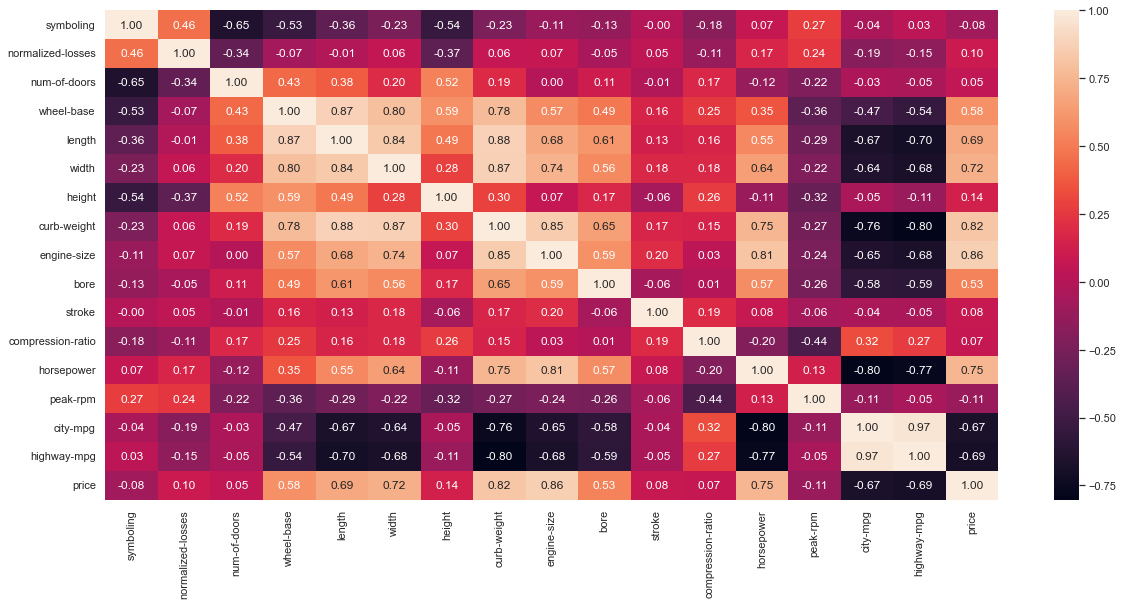

In [33]:
#Price is more correlated with engine size and curb weight of the car
#Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
#Wheel base is highly correlated with length and width of the car
#Symboling and normalized car are correlated than the other fields
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

### Displot of horsepower

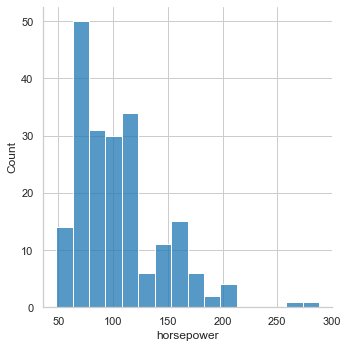

In [34]:
sns.displot(df['horsepower'])

In [35]:
df.columns

Index(['symboling', 'normalized-losses', 'Model', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Relating the variables with scatter plot

In [38]:
df['highway-mpg'] = df.index


C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


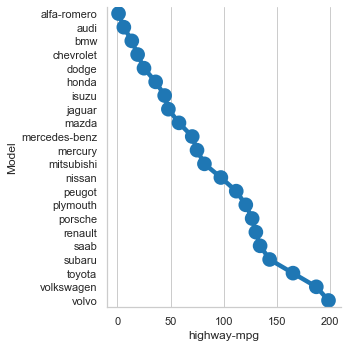

In [39]:
sns.factorplot(x='highway-mpg', y='Model', data=df)

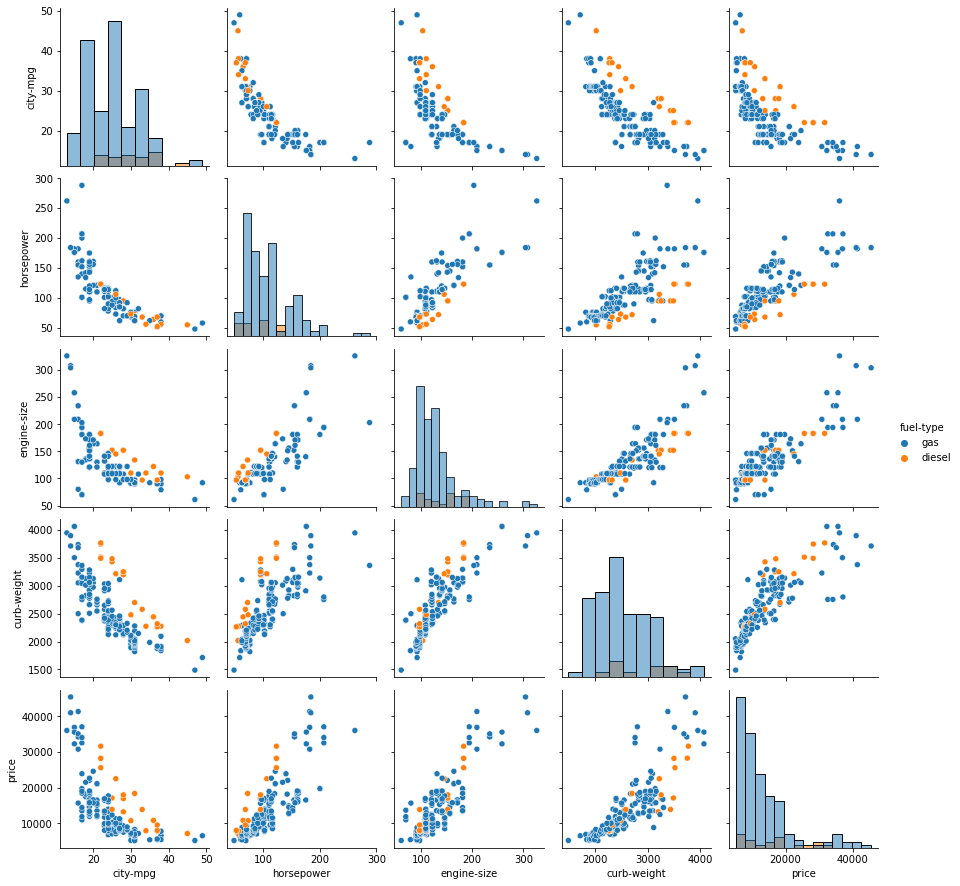

In [43]:
#Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight
#As horsepower increase the engine size increases
#Curbweight increases with the increase in Engine Size
g = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

<function matplotlib.pyplot.show(close=None, block=None)>

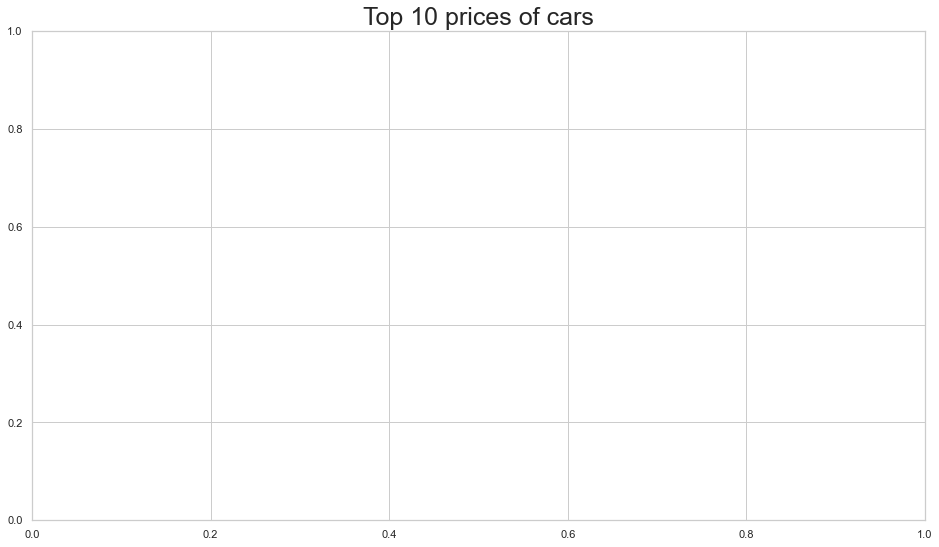

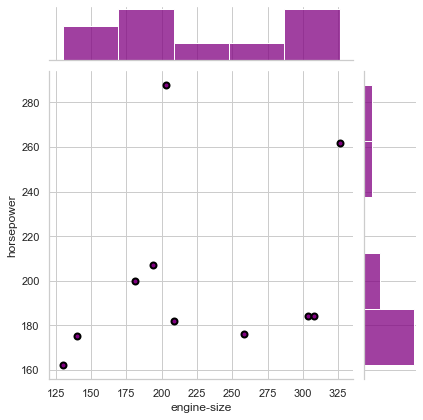

In [41]:
#As horsepower increase the engine size increases
top_10=df.groupby(by='engine-size').max()[['horsepower']].sort_values (by=['horsepower'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 prices of cars",size=25)
ax=sns.jointplot(data=top_10.iloc[:10],y="horsepower",x="engine-size", linewidth=2, edgecolor='black',color='purple')
plt.xlabel("engine-size")
plt.ylabel("horsepower")
plt.show

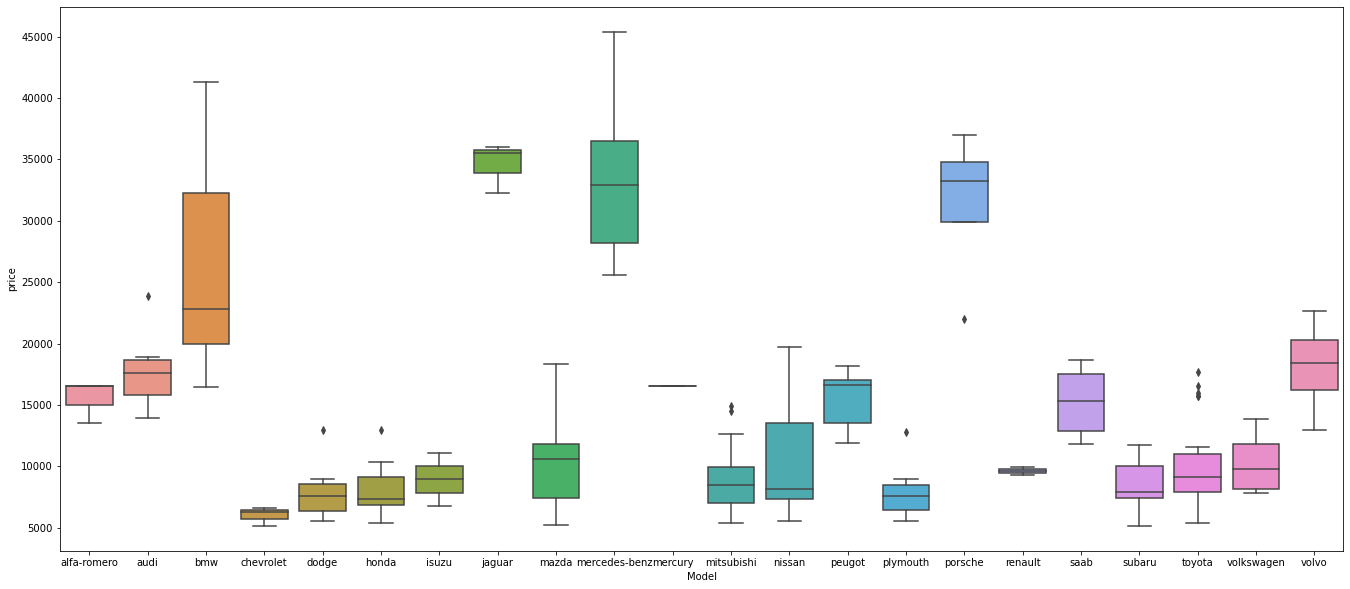

In [28]:
# The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
# The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
# Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
# Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Model", y="price", data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

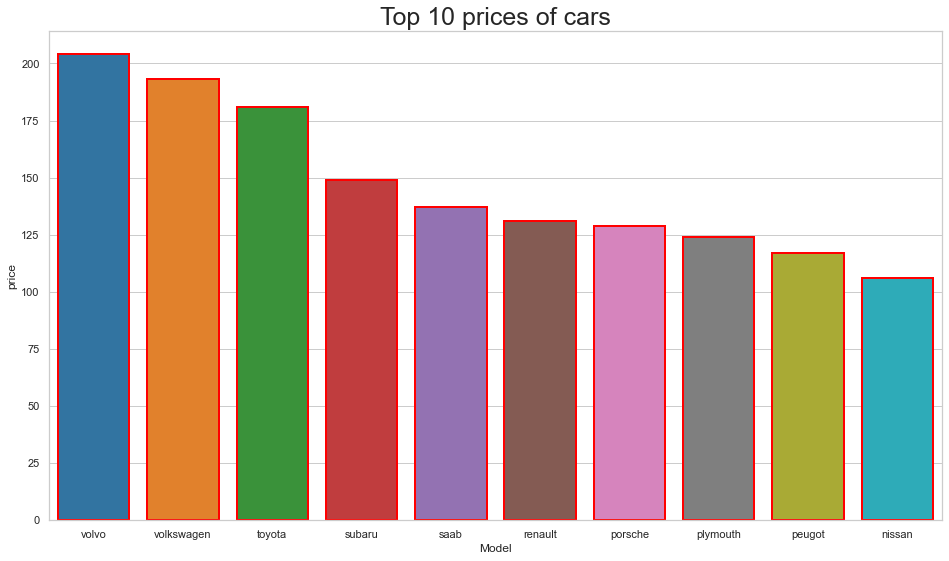

In [46]:
top_10=df.groupby(by='Model').max()[['price']].sort_values (by=['price'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title("Top 10 prices of cars",size=25)
ax=sns.barplot(data=top_10.iloc[:10],y="price",x="Model", linewidth=2, edgecolor='red')
plt.xlabel("Model")
plt.ylabel("price")
plt.show

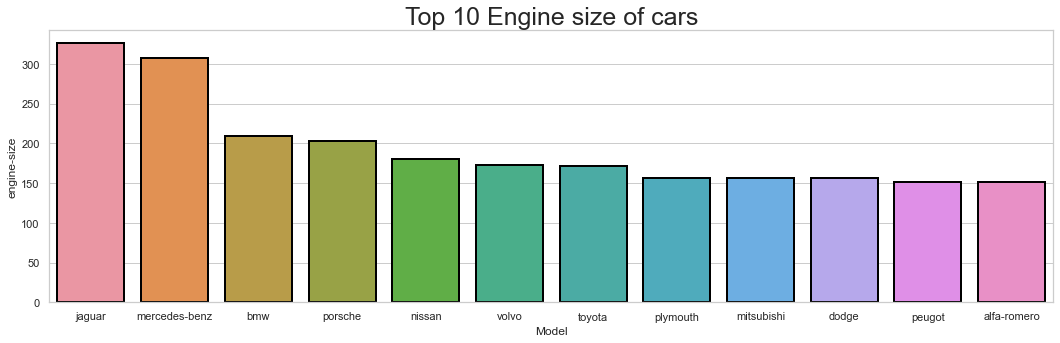

In [47]:
top_10_Engine_size=df.groupby(by='Model').max()[['engine-size']].sort_values(by=['engine-size'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Engine size of cars",size=25)
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="engine-size",x="Model", linewidth=2, edgecolor='black')

In [48]:
top_10_Engine_size=df.groupby(by='Model').max()[['horsepower']].sort_values(by=['horsepower'],ascending=False).reset_index()


In [49]:
fig=plt.figure(figsize=(18,5))

<Figure size 1296x360 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Horsepower of cars')

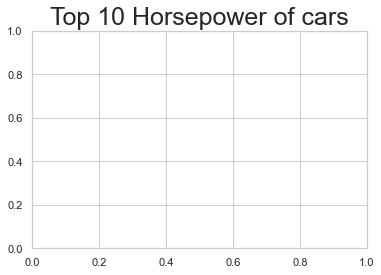

In [50]:
plt.title("Top 10 Horsepower of cars",size=25)

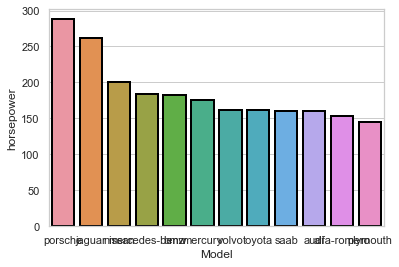

In [51]:
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="horsepower",x="Model", linewidth=2, edgecolor='black')

In [52]:
#Top 10 Car Models
top_10_CarModel=df.Model.value_counts().sort_values(ascending=False).head(10)
top_10_CarModel

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugot        11
volvo         11
dodge          9
Name: Model, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

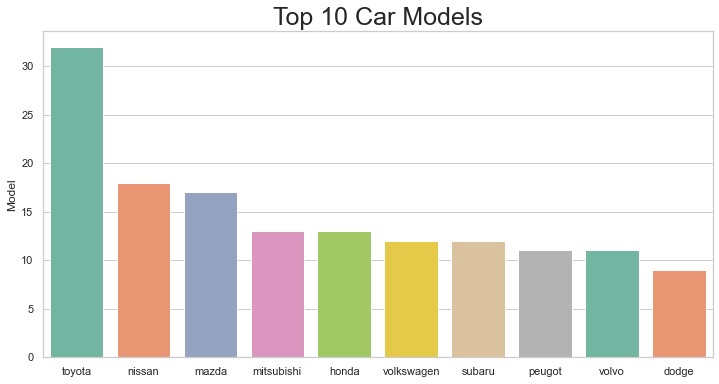

In [53]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Car Models",size=25)
sns.barplot(x=top_10_CarModel.index , y=top_10_CarModel, palette='Set2')
#plt.xlabel("Model")
plt.ylabel("Model")
plt.show

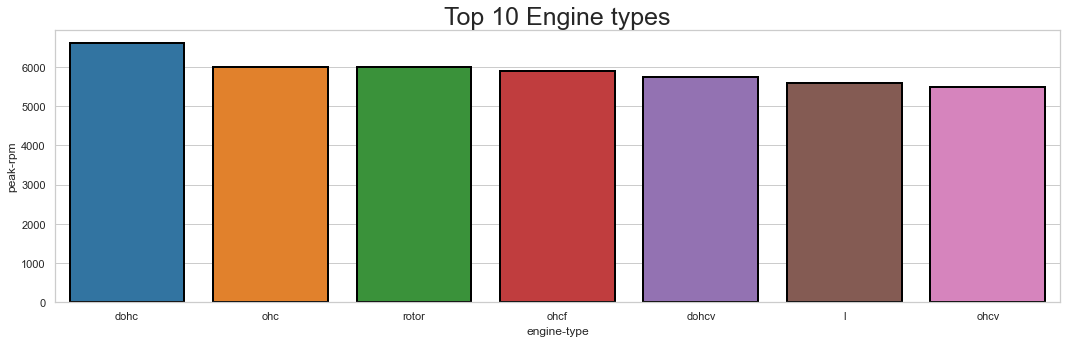

In [54]:
top_10_Engine_size=df.groupby(by='engine-type').max()[['peak-rpm']].sort_values(by=['peak-rpm'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Engine types",size=25)
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="peak-rpm",x="engine-type", linewidth=2, edgecolor='black')

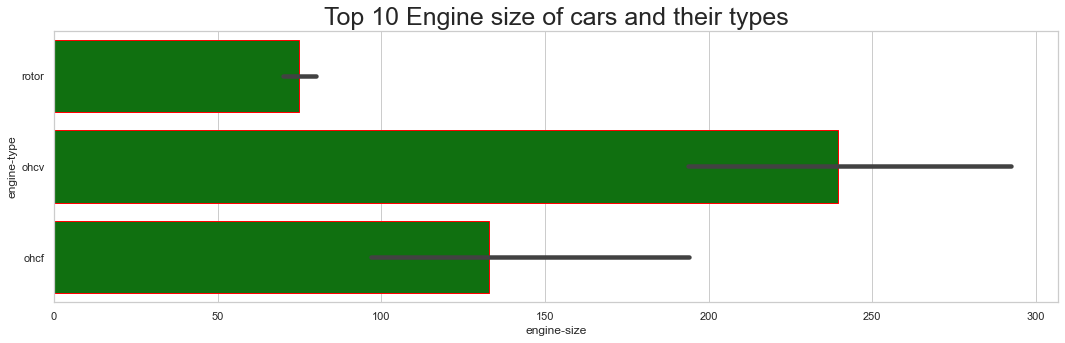

In [55]:
top_10_Engine_size=df.groupby(by='engine-size').max()[['engine-type']].sort_values(by=['engine-type'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Engine size of cars and their types",size=25)
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="engine-type",x="engine-size",color='green',edgecolor='red')

# Engine size distribution on histogram 

(array([ 6., 95., 46., 30., 14.,  7.,  2.,  2.,  0.,  3.]),
 array([ 61. ,  87.5, 114. , 140.5, 167. , 193.5, 220. , 246.5, 273. ,
        299.5, 326. ]),
 <BarContainer object of 10 artists>)

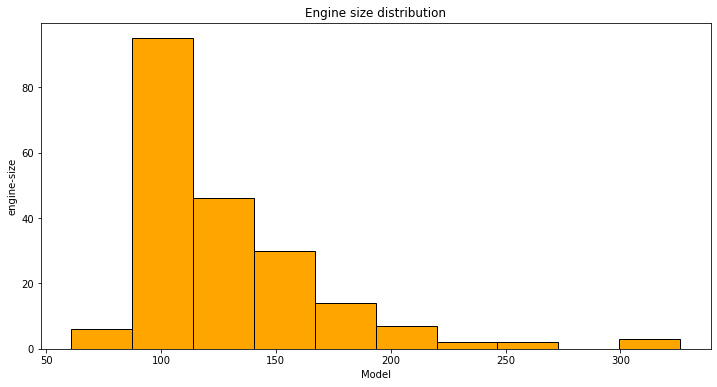

In [30]:
plt.figure(figsize=(12, 6))
plt.title("Engine size distribution")
plt.xlabel('Model')
plt.ylabel('engine-size') 
plt.hist(df['engine-size'],color='orange', edgecolor='black')

### Scatter plot of City and Highway MPG, Curb weight based on Make of the car

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


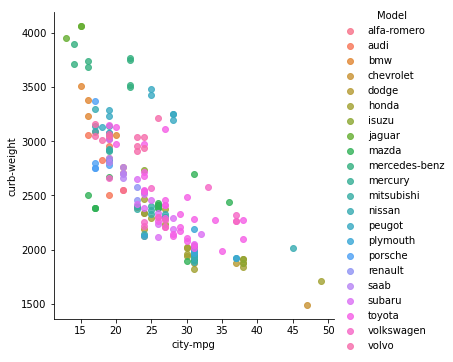

In [31]:
#Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile
#is inversely proportional to the curb weight.

#Heavier the Automobile less is the mileage for both City and Highway
g = sns.lmplot('city-mpg',"curb-weight", df, hue="Model", fit_reg=False);

### Univariate Analysis

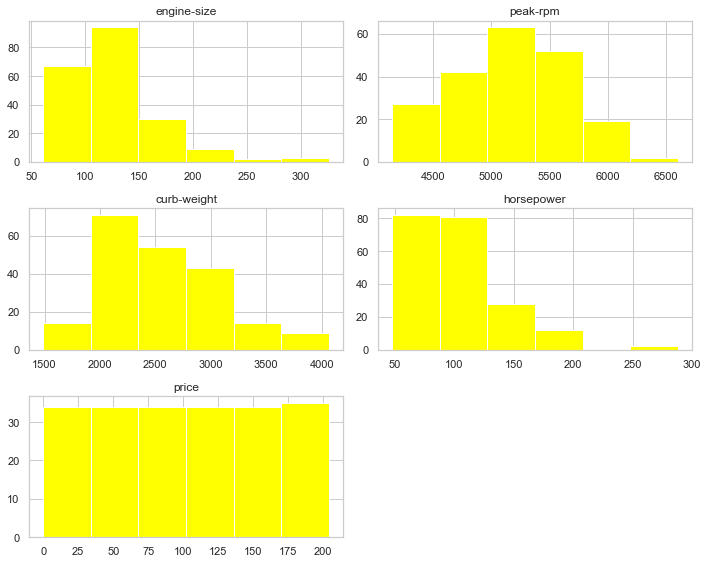

In [58]:
# 1 plt.figure(figsize=(10,8))
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='Yellow')
# 2 plt.figure(figsize=(10,8))
plt.tight_layout()
plt.show()

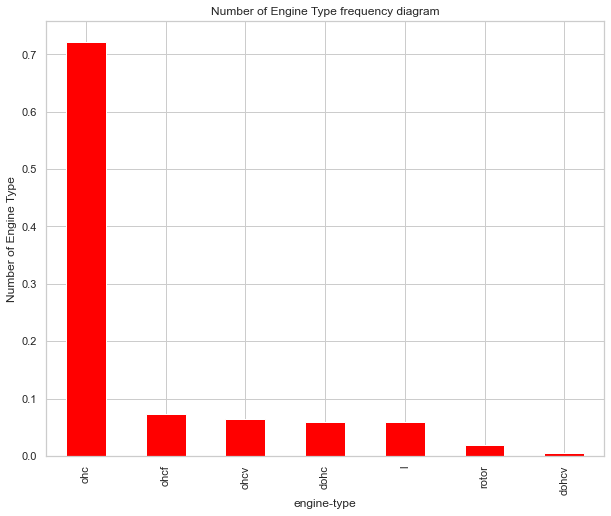

In [59]:
#More than 70 % of the vehicle has Ohc type of EngineMore than 70 % of the vehicle has Ohc type of Engine
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');

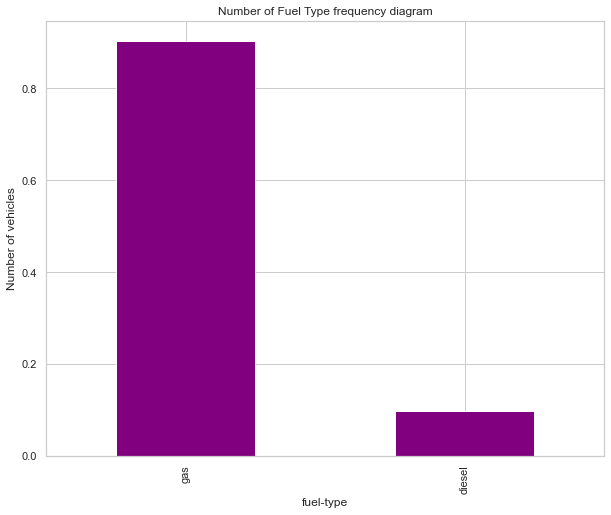

In [60]:
# Graph of fule type and vehicles
df['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type');


### Bivariate Analysis

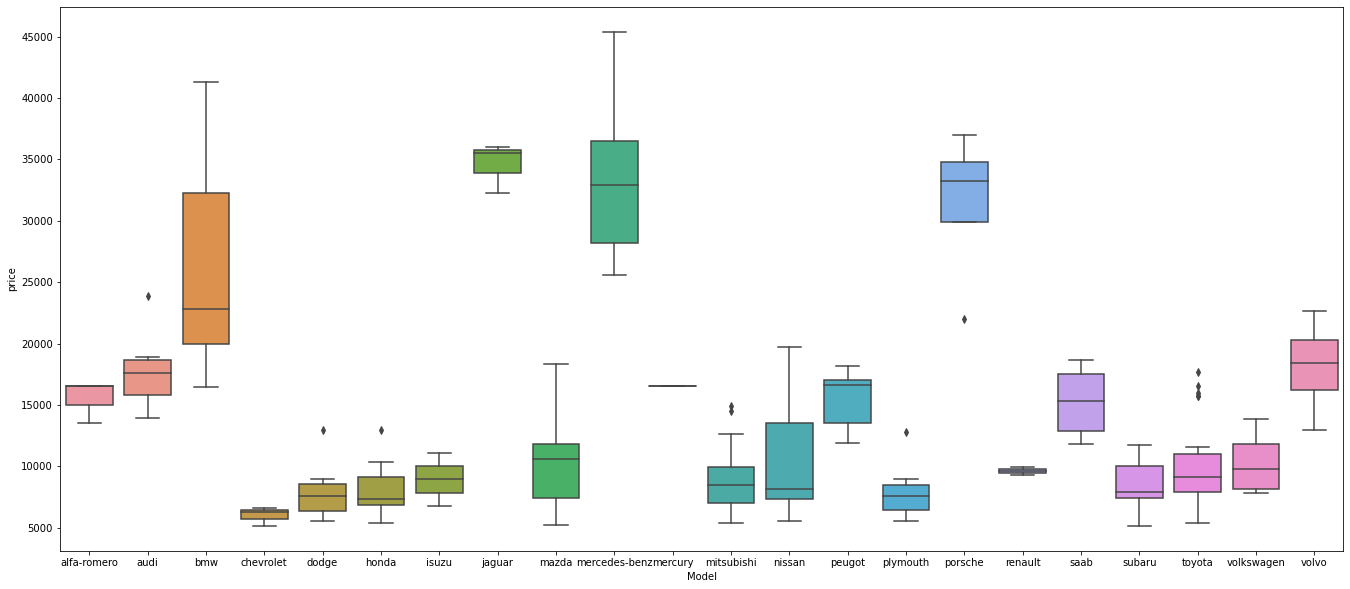

In [32]:
#Below are our findings on the make and price of the car
#    ○ The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
#    ○ The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
#    ○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
 #   ○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Model", y="price", data=df)

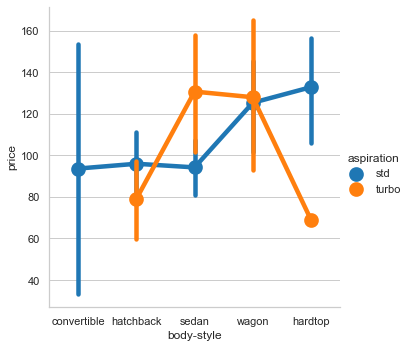

In [62]:
#Convertible has only standard edition with expensive cars
#hatchback and sedan turbo models are available below 20000
sns.catplot(data=df, x="body-style", y="price", hue="aspiration" ,kind="point")

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


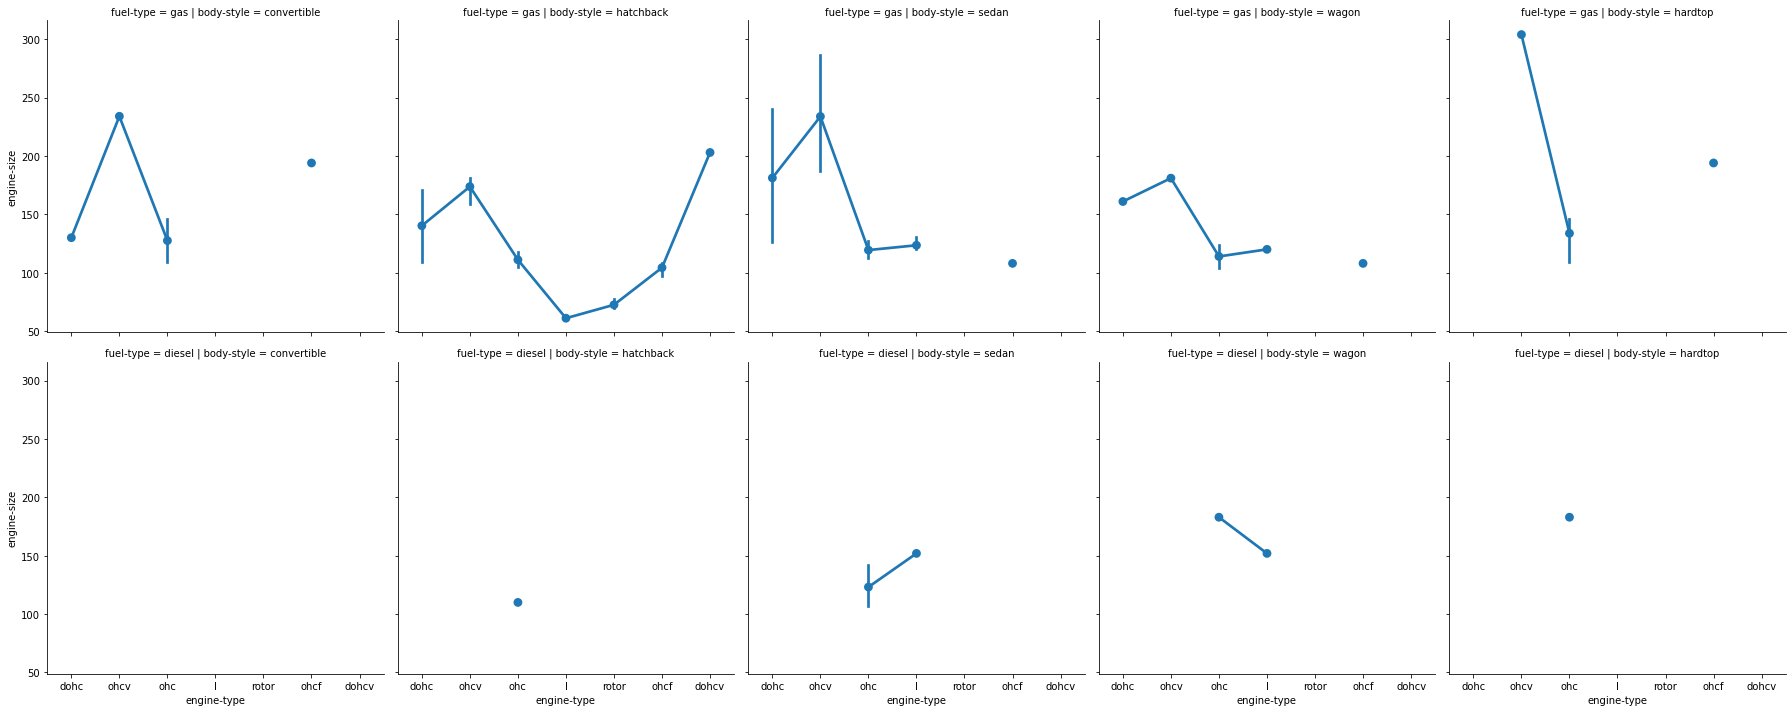

In [40]:
#Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
#cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices
#most of the cars comapany produces car in range below 25000
#Hardtop model are expensive in prices followed by convertible and sedan body style
#Turbo models have higher prices than for the standard model
#Convertible has only standard edition with expensive cars
#hatchback and sedan turbo models are available below 20000
#rwd wheel drive vehicle have expensive prices
sns.factorplot(data=df, x="engine-type", y="engine-size", col="body-style",row="fuel-type")

### Exploratory Analysis and Visualization

In [64]:
#  features affecting the price of the car in todays time
df['intercept'] = 1
df.rename(columns={'curb-weight' : 'curb_weight', 'engine-size' : 'engine_size', 'city-mpg':'city_mpg',
                    'highway-mpg':'highway_mpg'}, inplace = True) 

In [65]:
df.head()

,symboling,normalized-losses,Model,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city_mpg,highway_mpg,price,intercept
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,0,0,1
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,1,1,1
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,2,2,1
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,3,3,1
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,4,4,1


In [50]:
wheelbase_companies_df = df.groupby ('Model')['wheel-base'].mean()

In [51]:
wheel_base_capacity_df = wheelbase_companies_df.sort_values( ascending = False ).head(5)


In [52]:
wheel_base_capacity_df 

Model
mercedes-benz    110.925000
peugot           110.200000
jaguar           109.333333
volvo            106.481818
bmw              103.162500
Name: wheel-base, dtype: float64

In [69]:
df.columns

Index(['symboling', 'normalized-losses', 'Model', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb_weight', 'engine-type',
       'num-of-cylinders', 'engine_size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city_mpg',
       'highway_mpg', 'price', 'intercept'],
      dtype='object')

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


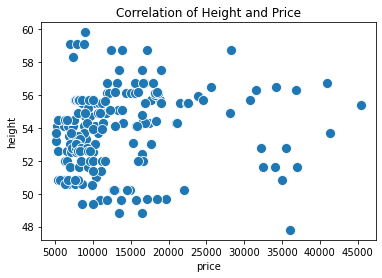

In [12]:
#Does the price of the car depends on its height?
plt.title('Correlation of Height and Price') 
sns.scatterplot(df.price, df.height, s=100);

### Exploratory Data Analysis

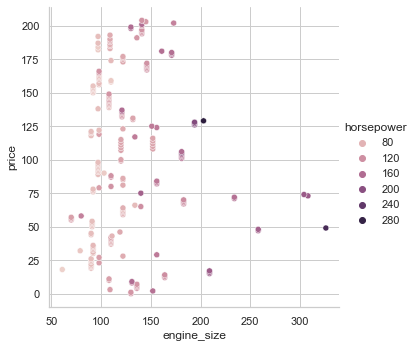

In [71]:
sns.relplot(y='price',x='engine_size', hue='horsepower',data=df)

In [72]:
df.dtypes

symboling              int64
normalized-losses    float64
Model                 object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine-type           object
num-of-cylinders      object
engine_size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
intercept              int64
dtype: object

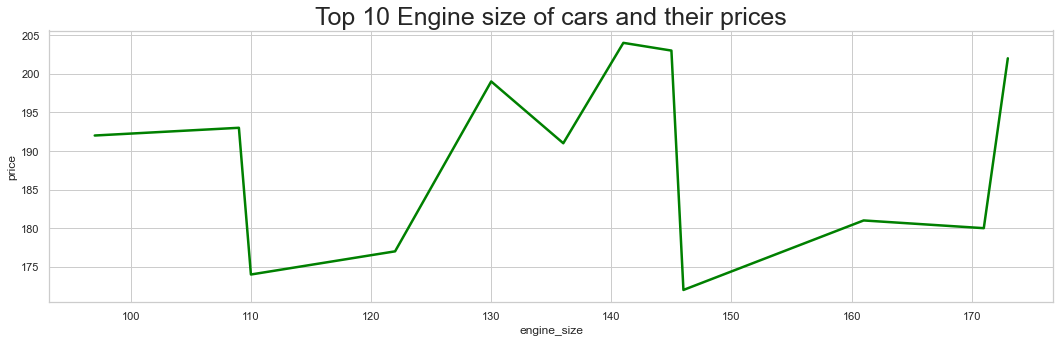

In [73]:
top_10_Engine_size=df.groupby(by='engine_size').max()[['price']].sort_values(by=['price'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Engine size of cars and their prices",size=25)
ax=sns.lineplot(data=top_10_Engine_size.iloc[:12],y="price",x="engine_size",color='green')

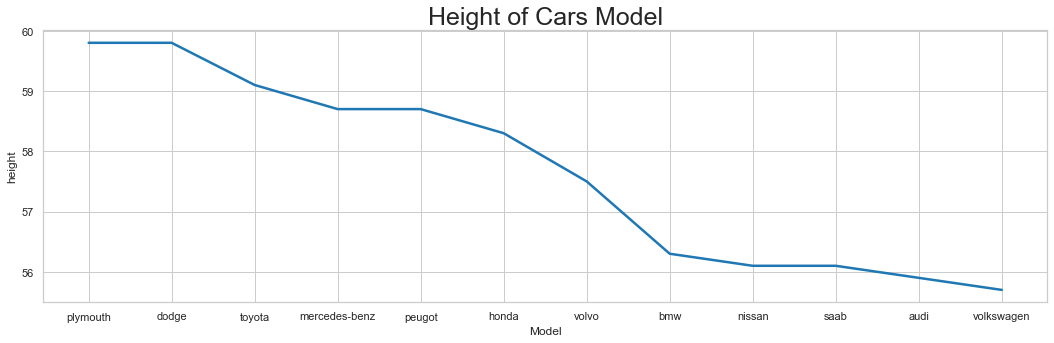

In [74]:
top_10_Engine_size=df.groupby(by='Model').max()[['height']].sort_values(by=['height'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Height of Cars Model",size=25)
ax=sns.lineplot(data=top_10_Engine_size.iloc[:12],y="height",x="Model")

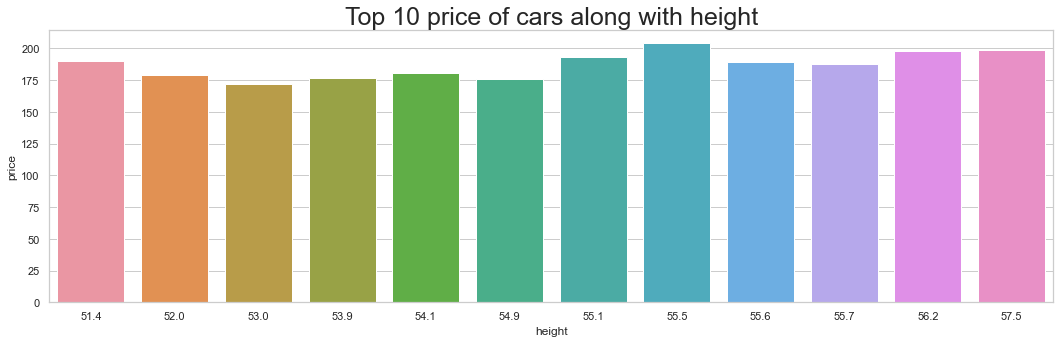

In [75]:
top_10_Engine_size=df.groupby(by='height').max()[['price']].sort_values(by=['price'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 price of cars along with height",size=25)
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="price",x="height")

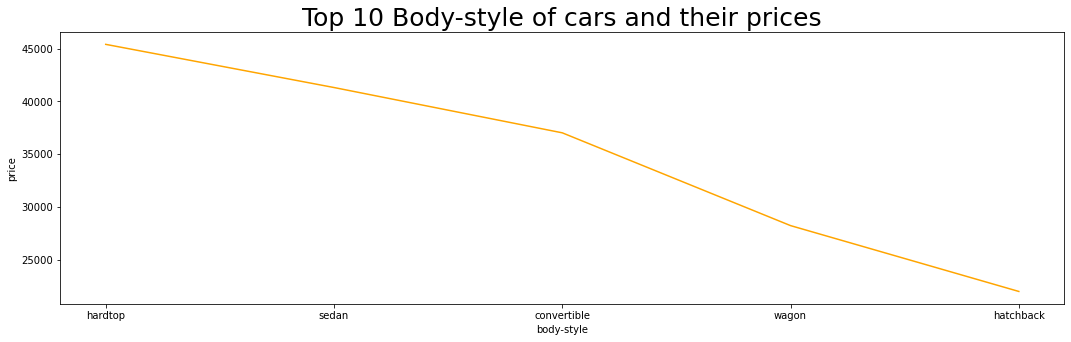

In [58]:
#Convertible has only standard edition with expensive cars

top_10_Engine_size=df.groupby(by='body-style').max()[['price']].sort_values(by=['price'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Body-style of cars and their prices",size=25)
ax=sns.lineplot(data=top_10_Engine_size.iloc[:12],y="price",x="body-style",color='orange')

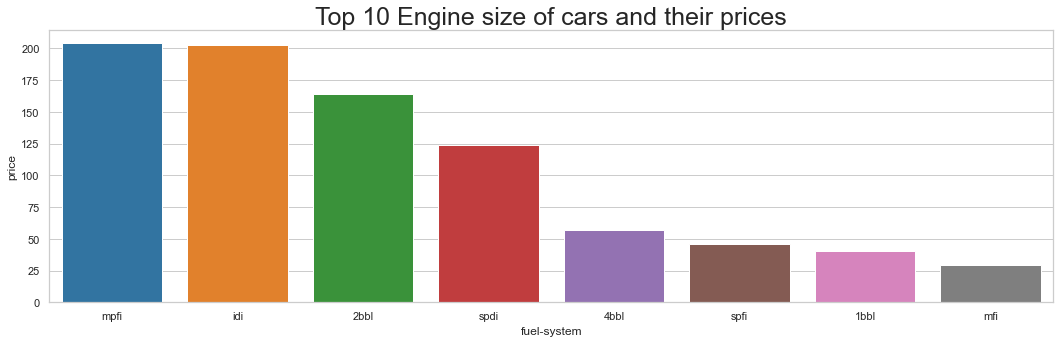

In [77]:
top_10_Engine_size=df.groupby(by='fuel-system').max()[['price']].sort_values(by=['price'],ascending=False).reset_index()
fig=plt.figure(figsize=(18,5))
plt.title("Top 10 Engine size of cars and their prices",size=25)
ax=sns.barplot(data=top_10_Engine_size.iloc[:12],y="price",x="fuel-system")

In [78]:
df.price.value_counts()

0      1
141    1
131    1
132    1
133    1
      ..
71     1
72     1
73     1
74     1
204    1
Name: price, Length: 205, dtype: int64

In [79]:
df.dtypes

symboling              int64
normalized-losses    float64
Model                 object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine-type           object
num-of-cylinders      object
engine_size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city_mpg               int64
highway_mpg            int64
price                  int64
intercept              int64
dtype: object

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


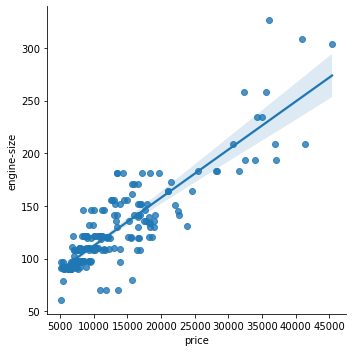

In [18]:
#The more the engine size the costlier the price is
g = sns.lmplot('price',"engine-size", df);

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


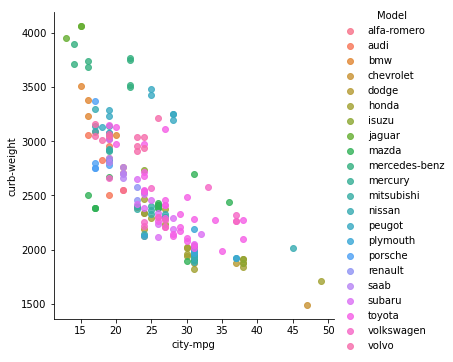

In [19]:
#Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage
#of the automobile is inversely proportional to the curb weight.
#Heavier the Automobile less is the mileage for both City and Highway
g = sns.lmplot('city-mpg',"curb-weight", df, hue="Model", fit_reg=False);

C:\Users\imriy\Documents\Riya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


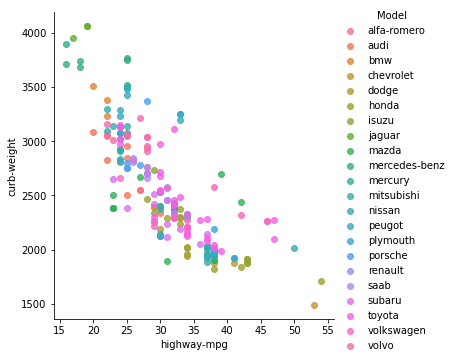

In [21]:
g = sns.lmplot('highway-mpg',"curb-weight", df, hue="Model",fit_reg=False);

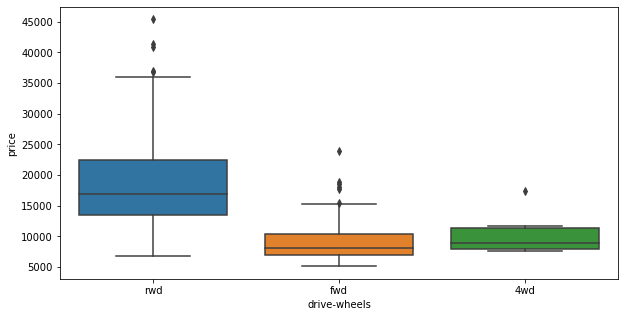

In [22]:
#It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars.
#Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel
#drive cars in our dataset so this picture might not be very accurate.
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

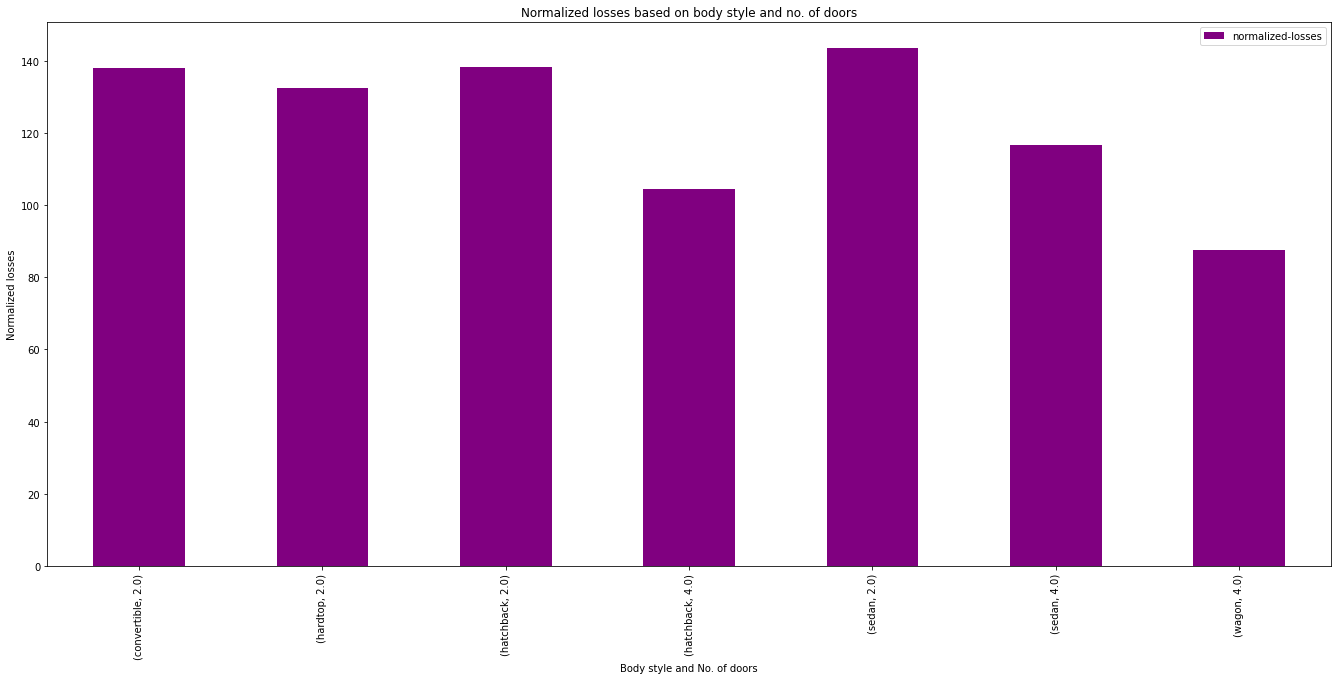

In [29]:
#Normalized losses based on body style and no. of doors
#As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features
#of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the
#two door cars has more number of losses than the four door cars.
pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

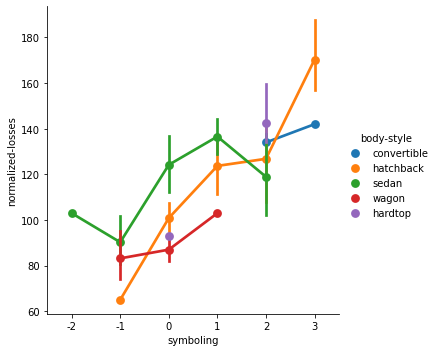

In [41]:
#ohc is the most used Engine Type both for diesel and gas
#Diesel vehicle have Engine type "ohc" and "I" and engine size ranges between 100 to 190
#Engine type ohcv has the bigger Engine size ranging from 155 to 300
#Body-style Hatchback uses max variety of Engine Type followed by sedan
#Body-style Convertible is not available with Diesel Engine type
#Vehicle with above 200 horsepower has Eight Twelve Six cyclinders
sns.catplot(data=df, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")